# Explore here

In [22]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')


In [23]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [24]:
artist_id = '0KPX4Ucy9dk82uj4GpKesn'

response = con.artist_top_tracks(artist_id)

print(response)


{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0KPX4Ucy9dk82uj4GpKesn'}, 'href': 'https://api.spotify.com/v1/artists/0KPX4Ucy9dk82uj4GpKesn', 'id': '0KPX4Ucy9dk82uj4GpKesn', 'name': 'Dalex', 'type': 'artist', 'uri': 'spotify:artist:0KPX4Ucy9dk82uj4GpKesn'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV

In [29]:
if response: 
    tracks = response['tracks']

print(tracks[0]['artists'][0]['name']) 

tracks1 = [{k:(v/(1000*60)%60) if k == 'duration_ms' else v for k,v in track.items() if k in ['name', 'popularity', 'duration_ms']}for track in tracks]

print(tracks1)

Dalex
[{'duration_ms': 4.158666666666667, 'name': 'Hola - Remix', 'popularity': 71}, {'duration_ms': 6.016, 'name': 'Pa Mí - Remix', 'popularity': 71}, {'duration_ms': 3.8289666666666666, 'name': 'LA RANGER (feat. Myke Towers)', 'popularity': 68}, {'duration_ms': 3.544216666666667, 'name': 'Porno', 'popularity': 69}, {'duration_ms': 4.7751, 'name': 'Cuaderno', 'popularity': 69}, {'duration_ms': 3.6011, 'name': 'Quizas', 'popularity': 67}, {'duration_ms': 3.9017166666666667, 'name': 'QUÍTENME EL TELÉFONO (feat. Yandel, Jay Wheeler)', 'popularity': 65}, {'duration_ms': 4.032633333333333, 'name': 'SI SI SI SI (feat. Eladio Carrion, Bryant Myers, Dei V)', 'popularity': 62}, {'duration_ms': 3.7502166666666668, 'name': 'Imaginate', 'popularity': 66}, {'duration_ms': 3.29535, 'name': 'Elegí (feat. Dímelo Flow)', 'popularity': 66}]


In [26]:
tracks2 = []
for track in tracks: 
    for k,v in track.items():
        cancion = {}
        if k in ['name', 'popularity', 'duration_ms']:
            if k == 'duration_ms':
                v= (v/1000*60)%60
            cancion[k] = v 
            print(cancion)
    tracks2.append(cancion)        

print(tracks2)   

{'duration_ms': 0.24952000000000005}
{'name': 'Hola - Remix'}
{'popularity': 71}
{'duration_ms': 0.36096}
{'name': 'Pa Mí - Remix'}
{'popularity': 71}
{'duration_ms': 0.229738}
{'name': 'LA RANGER (feat. Myke Towers)'}
{'popularity': 68}
{'duration_ms': 0.212653}
{'name': 'Porno'}
{'popularity': 69}
{'duration_ms': 0.286506}
{'name': 'Cuaderno'}
{'popularity': 69}
{'duration_ms': 0.216066}
{'name': 'Quizas'}
{'popularity': 67}
{'duration_ms': 0.234103}
{'name': 'QUÍTENME EL TELÉFONO (feat. Yandel, Jay Wheeler)'}
{'popularity': 65}
{'duration_ms': 0.24195799999999998}
{'name': 'SI SI SI SI (feat. Eladio Carrion, Bryant Myers, Dei V)'}
{'popularity': 62}
{'duration_ms': 0.225013}
{'name': 'Imaginate'}
{'popularity': 66}
{'duration_ms': 0.19772099999999998}
{'name': 'Elegí (feat. Dímelo Flow)'}
{'popularity': 66}
[{'popularity': 71}, {'popularity': 71}, {'popularity': 68}, {'popularity': 69}, {'popularity': 69}, {'popularity': 67}, {'popularity': 65}, {'popularity': 62}, {'popularity': 66

In [30]:
tracks_df = pd.DataFrame.from_records(tracks1)
tracks_df

,duration_ms,name,popularity
0,4.158667,Hola - Remix,71
1,6.016000,Pa Mí - Remix,71
2,3.828967,LA RANGER (feat. Myke Towers),68
3,3.544217,Porno,69
4,4.775100,Cuaderno,69
5,3.601100,Quizas,67
6,3.901717,"QUÍTENME EL TELÉFONO (feat. Yandel, Jay Wheeler)",65
7,4.032633,"SI SI SI SI (feat. Eladio Carrion, Bryant Myer...",62
8,3.750217,Imaginate,66
9,3.295350,Elegí (feat. Dímelo Flow),66


In [31]:
tracks_df.sort_values(['popularity'], inplace=True, ascending=False)
tracks_df

,duration_ms,name,popularity
0,4.158667,Hola - Remix,71
1,6.016000,Pa Mí - Remix,71
3,3.544217,Porno,69
4,4.775100,Cuaderno,69
2,3.828967,LA RANGER (feat. Myke Towers),68
5,3.601100,Quizas,67
9,3.295350,Elegí (feat. Dímelo Flow),66
8,3.750217,Imaginate,66
6,3.901717,"QUÍTENME EL TELÉFONO (feat. Yandel, Jay Wheeler)",65
7,4.032633,"SI SI SI SI (feat. Eladio Carrion, Bryant Myer...",62


In [32]:
tracks_df.head(3)

,duration_ms,name,popularity
0,4.158667,Hola - Remix,71
1,6.016000,Pa Mí - Remix,71
3,3.544217,Porno,69


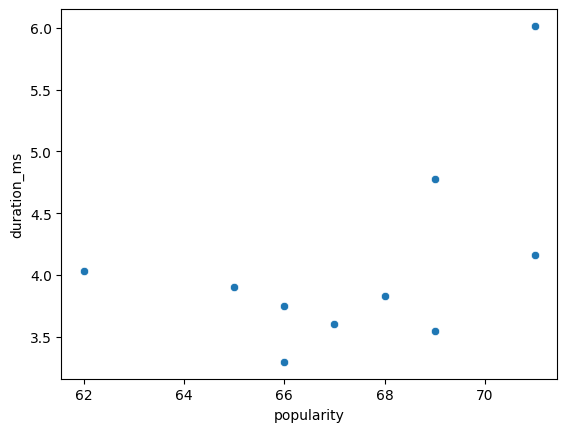

In [35]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x='popularity', y='duration_ms')
fig = scatter_plot.get_figure()
fig.savefig('scatter_plot.png')